In [1]:
# 주성분을 사용해 특성 줄이기
# 사이킷런 손글씨 데이터를 활용하여 특성 행렬을 표준화 처리 및 주성분 특성 줄이기

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [5]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [3]:
print(digits['data'])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
print(digits['target'])

[0 1 2 ... 8 9 8]


In [7]:
# 8X8 크기의 손글씨 숫자 데이터 로드
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리
features = StandardScaler().fit_transform(digits.data)

# 99%의 분산을 유지하도록 PCA 클래스 객체 생성
pca = PCA(n_components=0.99, whiten=True)

# PCA 수행
features_pca = pca.fit_transform(features)
print(features_pca)


[[ 0.70631939 -0.39512814 -1.73816236 ...  0.36526417 -0.31369006
   0.05355504]
 [ 0.21732591  0.38276482  1.72878893 ... -0.17818068 -0.14031747
   1.18179755]
 [ 0.4804351  -0.13130437  1.33172761 ... -0.01924571 -0.23580029
   0.92966158]
 ...
 [ 0.37732433 -0.0612296   1.0879821  ... -1.05526847  1.75559618
  -0.87894699]
 [ 0.39705007 -0.15768102 -1.08160094 ...  0.10442881  0.65907949
   1.1292155 ]
 [-0.46407544 -0.92213976  0.12493334 ... -1.10593026  0.54434185
  -0.26573597]]


In [8]:
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


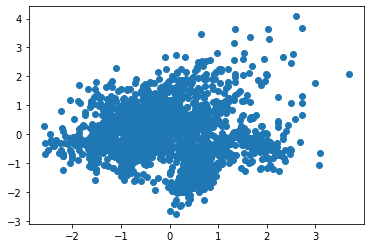

In [9]:
# 주성분에 투영된 처음 두 개의 특성을 사용해 산점도 출력
import matplotlib.pyplot as plt

plt.scatter(features_pca[:,0], features_pca[:,1])
plt.show()

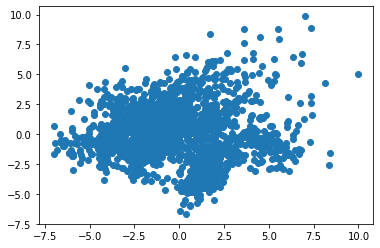

In [10]:
# whiten 여부에 따른 차이 시각화

pca_nowhiten = PCA(n_components =0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:,0], features_nowhiten[:,1])
plt.show()

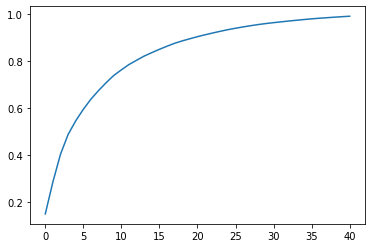

In [11]:
# 넘파이 cumsum()를 사용하여 분산을 누적하여 그래프 출력
# 대략 30개의 주성분으로도 80% 이상의 분산을 유지
# 표준화하지 않은 원본 데이터를 사용합니다.
import numpy as np

pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

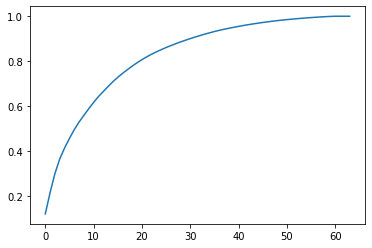

In [12]:
## 특성 행렬을 주성분에 투영하려면 components_ 배열 전치하여 행렬곱을 수행합니다.
# 넘파이 allclose()를 사용하여 feature_nowhiten 배열과 동일한지 확인

np.allclose(features_nowhiten, np.dot(features,pca_nowhiten.components_.T))

pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [26]:
# 선형적으로 구분되지 않는 데이터의 차원 축소

from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터 만들기
feautures, _ = make_circles(
    n_samples = 1000, random_state =1,noise=0.1, factor=0.1)
print(features)

# 방사 기저 함수(radius basic function, RBF)를 사용하여 커널 PCA를 적용
kpca = KernelPCA(kernel='rbf', gamma=5, n_components=50)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])


[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
원본 특성 개수: 64
줄어든 특성 개수: 50


kpca = KernelPCA(kernel='rbf', gamma=5, n_components=50)
gamma와 n_components 사이에 반비례 관계 성립함을 볼수있다.

In [38]:
# 클래스 분리를 최대화함으로써 특성 축소
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris() # 붓꽃 데이터셋을 로드
features = iris.data
target = iris.target


# LDA 객체를 만들고 실행하여 특성을 변환합니다.
lda= LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])


원본 특성 개수: 4
줄어든 특성 개수: 1


array([0.9912126])

In [30]:
print(target)
print(features)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [42]:
lda= LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

# 설명된 분산의 비율이 담긴 배열을 저장
lda_var_ratios = lda.explained_variance_ratio_
print(lda_var_ratios)

def select_n_components(var_ratio, goal_var: float) -> int:
  total_variance = 0.0  # 설명된 분산의 초기값을 지정
  n_components = 0      # 특성 개수의 초기값을 지정

  for explained_variance in var_ratio:    # 각 특성의 설명된 분산을 순회 Loop
    total_variance += explained_variance   # 설명된 분산 값을 누적
    n_components += 1   # 성분 개수를 카운트
    if total_variance >= goal_var:   # 설명된 분산이 목표치에 도달하면 반복문 종료
      break
  return n_components   # 성분의 개수 반환

temp = select_n_components(lda_var_ratios, 0.95)  # 함수를 실행
print("temp =", temp)

[0.9912126 0.0087874]
temp = 1


# 순서가 없는 범주형 특성 인코딩

In [48]:
# 순서가 없는 범주형 특성 인코딩
# 사이킷런의 LabelBinarizer 를 사용하여 문자열 타깃 데이터를 원-핫 인코딩

from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

feature = np.array([["Texas"],
                   ["California"],
                   ["Texas"],
                   ["Delaware"],
                   ["Texas"]]
                   )    # 특성 데이터 생성
print(feature)

one_hot = LabelBinarizer()        # 원-핫 인코더 생성
one_hot.fit_transform(feature)    # 특성을 원-핫 인코딩 변환
# print(one_hot.classes_)     # 클래스 확인 ['California' 'Delaware' 'Texas']

# 원-핫 인코딩 되돌리기
one_hot_data = one_hot.inverse_transform(one_hot.transform(feature))
print("one_hot >>>", one_hot_data)
  

[['Texas']
 ['California']
 ['Texas']
 ['Delaware']
 ['Texas']]
one_hot >>> ['Texas' 'California' 'Texas' 'Delaware' 'Texas']


In [51]:
# MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

multiclass_feature = [("Texas", "Florida"),
                      ("California", "Alabama"),
                      ("Texas", "Florida"),
                      ("Delware", "Florida"),
                      ("Texas", "Florida")]   # 다중 클래스 특성 생성
print(multiclass_feature)

one_hot_multiclass = MultiLabelBinarizer()    # 다중 클래스 원-핫 인코더 객체 생성
one_hot_multiclass.fit_transform(multiclass_feature)     # 다중 클래스 특성을 원-핫 인코딩 수행

ont_hot_data = one_hot_multiclass.classes_    # 특성의 클래스를 확인
print("class >>>", ont_hot_data)

# one_hot_data = one_hot.inverse_transform(one_hot.transform(feature))
# print("one_hot >>>", one_hot_data)

[('Texas', 'Florida'), ('California', 'Alabama'), ('Texas', 'Florida'), ('Delware', 'Florida'), ('Texas', 'Florida')]
['Alabama' 'California' 'Delware' 'Florida' 'Texas']
one_hot_multiclass >> ['Alabama' 'California' 'Delware' 'Florida' 'Texas']


In [54]:
# 순서가 없는 범주형 데이터 처리
# 사이킷 런의 LabelBinarizer를 사용하여 문자열 타깃 데이터 원-핫 인코딩 진행

feature =np.array([["Texas",1],
                   ["California",1],
                   ["Texas",3],
                   ["Delaware",1],
                   ["Texas",1]])    # 여러 개의 열이 있는 특성 배열 생성

# 희소배열 반환이 기본값이며 sparse-False 로 지정하면 밀집 배열 변환
one_hot_encoder = OneHotEncoder(sparse=False)
print(feature)


# OneHotEncoder -> 입력 특성 배열을 모두 범주형으로 인식하여 변환합니다.
one_hot_encoder.fit_transform(feature)
one_hot_encoder_data = one_hot_encoder.categories_  # categories_ 속성으로 클래스 확인                               

print("one_hot_encoder_data >>", one_hot_encoder_data)



[['Texas' '1']
 ['California' '1']
 ['Texas' '3']
 ['Delaware' '1']
 ['Texas' '1']]
one_hot_encoder_data >> [array(['California', 'Delaware', 'Texas'], dtype='<U21'), array(['1', '3'], dtype='<U21')]


# 순서가 있는 범주형 특성 인코딩

In [57]:
# 순서가 있는 범주형 특성 인코딩

import pandas as pd

dataframe = pd.DataFrame(
    {"Score": ["Low","Low", "Medium", "Medium", "High"]}    # 특성 데이터 생성
)
scale_mapper = {"Low": 1,
                "Medium": 2,
                "High": 3}    # 매핑 딕셔너리 생성
data1 = dataframe["Score"].replace(scale_mapper)    # 특성을 정수로 변환

print(data1)



dataframe = pd.DataFrame(
    {"Score": ["Low","Low", "Medium", "Medium", "High", "Barely More Than Medium"]}
)
scale_mapper = {"Low": 1,
                "Medium": 2,
                "Barely More Than Medium":3,
                "High": 4}    # 매핑 딕셔너리 생성
data2 = dataframe["Score"].replace(scale_mapper)    # 특성을 정수로 변환

print(data2)


0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64
0    1
1    1
2    2
3    2
4    4
5    3
Name: Score, dtype: int64


In [61]:
# 순서가 있는 범주형 특성 인코딩
# OrdinalEncoder 이용
from sklearn.preprocessing import OrdinalEncoder

features = np.array([["Low", 10],
                     ["Medium", 50],
                     ["High", 3],
                     ["Ace", 100]])
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(features)
ordinalEncoder_data = ordinal_encoder.categories_

print("OrdinalEncoder >>", ordinalEncoder_data)

OrdinalEncoder >> [array(['Ace', 'High', 'Low', 'Medium'], dtype='<U21'), array(['10', '100', '3', '50'], dtype='<U21')]


In [63]:
# 순서가 있는 범주형 특성 인코딩
# 특성 딕셔너리 인코딩
# DictVectorizer 클래스는 0이 아닌 갓의 원소만 저장하는 희소 행렬을 반환
# 자연어 처리 분야와 같은 매우 큰 행렬을 다룰때 메모리 사용량을 최소화해야하기 때문에 유용
# sparse=False로 지정하면 밀집 벡터를 출력할 수 있습니다.
# get_feature_names()를 사용하여 생성된 특성의 이름을 얻을 수 있습니다.
from sklearn.feature_extraction import DictVectorizer

data_dict =[{"Red":2,"Blue":4},
            {"Red":4,"Blue":3},
            {"Red":1,"Green":2},
            {"Red":2,"Green":2},
            {"Red":2,"Yellow":3},
            {"Red":2,"Yellow":1}]   # 딕셔너리 생성

dictvectorizer = DictVectorizer(sparse=False)   # DictVectorizer 객체 생성
# 0이 아닌 원소만 저장하는 희소 행렬을 반환

features = dictvectorizer.fit_transform(data_dict)    # 딕셔너리를 특성 행렬로 변환
print(features)   # 특성 행렬을 확인
feature_names = dictvectorizer.get_feature_names()    # 특성 이름을 얻습니다.
print(feature_names)    # 특성 이름을 확인
dict_data = pd.DataFrame(features, columns=feature_names)
print(dict_data)

[[4. 0. 2. 0.]
 [3. 0. 4. 0.]
 [0. 2. 1. 0.]
 [0. 2. 2. 0.]
 [0. 0. 2. 3.]
 [0. 0. 2. 1.]]
['Blue', 'Green', 'Red', 'Yellow']
   Blue  Green  Red  Yellow
0   4.0    0.0  2.0     0.0
1   3.0    0.0  4.0     0.0
2   0.0    2.0  1.0     0.0
3   0.0    2.0  2.0     0.0
4   0.0    0.0  2.0     3.0
5   0.0    0.0  2.0     1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
# 행렬 데이터형태
# 네 개의 문서에 대한 단어 카운트 딕셔너리를 데이터로

doc_1_word_count = {"Red":2,"Blue":4}
doc_2_word_count = {"Red":4,"Blue":3}
doc_3_word_count = {"Red":1,"Green":2}
doc_4_word_count = {"Red":2,"Green":2}
doc_5_word_count = {"Red":2,"Yellow":3}
doc_6_word_count = {"Red":2,"Yellow":1}
doc_word_counts = [doc_1_word_count,
                   doc_2_word_count,
                   doc_3_word_count,
                   doc_4_word_count,
                   doc_5_word_count,
                   doc_6_word_count]    # 리스트로 생성

# 단어 카운트 딕셔너리를 특성 행렬로 변환합니다.
data_array = dictvectorizer.fit_transform(doc_word_counts)
print(data_array)

[[4. 0. 2. 0.]
 [3. 0. 4. 0.]
 [0. 2. 1. 0.]
 [0. 2. 2. 0.]
 [0. 0. 2. 3.]
 [0. 0. 2. 1.]]


# 누락된 클래스 값 대처하기

In [75]:
# 누락된 클래스 값 대처하기-01
# KNN이용

from sklearn.neighbors import KNeighborsClassifier

X = np.array([[0, 2.10, 1.45],
              [1, 1.18, 1.33],
              [0, 1.22, 1.27],
              [1, -0.21, -1.19]])   # 범주형 특성을 가진 특성 행렬 생성
print("X =\n",X)
print("\n")

# 범주형 특성에 누락된 값이 있는 특성 행렬 만들기
X_with_nan = np.array([[np.nan, 0.87, 1.31],[np.nan, -0.67, -0.22]])
print("X_with_nan =\n",X_with_nan)
print("\n")

# KNN 객체 생성
clf = KNeighborsClassifier(3, weights='distance')

trained_model = clf.fit(X[:,1:], X[:,0])  # 훈련

# 누락된 값의 클래스 예측
imputed_values = trained_model.predict(X_with_nan[:,1:])
print("imputed_values =\n",imputed_values)
print("\n")

# 예측된 클래스와 원본 특성을 열로 합침
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))
print("X_with_imputed =\n",X_with_imputed)
print("\n")

# 두 특성 행렬을 연결
data = np.vstack((X_with_imputed, X))

print("data =\n",data)

X =
 [[ 0.    2.1   1.45]
 [ 1.    1.18  1.33]
 [ 0.    1.22  1.27]
 [ 1.   -0.21 -1.19]]


X_with_nan =
 [[  nan  0.87  1.31]
 [  nan -0.67 -0.22]]


imputed_values =
 [0. 1.]


X_with_imputed =
 [[ 0.    0.87  1.31]
 [ 1.   -0.67 -0.22]]


data =
 [[ 0.    0.87  1.31]
 [ 1.   -0.67 -0.22]
 [ 0.    2.1   1.45]
 [ 1.    1.18  1.33]
 [ 0.    1.22  1.27]
 [ 1.   -0.21 -1.19]]


In [80]:
# 누락된 클래스 값 대처하기 - 02
# 누락된 값을 특성에서 가장 자주 등장하는 값으로 채우기

from sklearn.impute import SimpleImputer

X = np.array([[0, 2.10, 1.45],
              [1, 1.18, 1.33],
              [0, 1.22, 1.27],
              [1, -0.21, -1.19],
              [1, -0.4, -7.1]])   # 범주형 특성을 가진 특성 행렬 생성

# 범주형 특성에 누락된 값이 있는 특성 행렬 만들기
X_with_nan = np.array([[np.nan, 0.87, 1.31],[np.nan, -0.67, -0.22]])

# KNN 객체 생성
clf = KNeighborsClassifier(3, weights='distance')

trained_model = clf.fit(X[:,1:], X[:,0])  # 훈련

# 누락된 값의 클래스 예측
imputed_values = trained_model.predict(X_with_nan[:,1:])

# 예측된 클래스와 원본 특성을 열로 합침
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))

# 두 특성 행렬을 연결
data = np.vstack((X_with_imputed, X))

# 누락된 값을 특성에서 가장 자주 등장하는 값으로 채우기
X_complete = np.vstack((X_with_nan, X))
print("X_complete =\n",X_complete)
print("\n")

imputer = SimpleImputer(strategy='most_frequent')

data_imputer = imputer.fit_transform(X_complete)
print("data_imputer =\n",data_imputer)

X_complete =
 [[  nan  0.87  1.31]
 [  nan -0.67 -0.22]
 [ 0.    2.1   1.45]
 [ 1.    1.18  1.33]
 [ 0.    1.22  1.27]
 [ 1.   -0.21 -1.19]
 [ 1.   -0.4  -7.1 ]]


data_imputer =
 [[ 1.    0.87  1.31]
 [ 1.   -0.67 -0.22]
 [ 0.    2.1   1.45]
 [ 1.    1.18  1.33]
 [ 0.    1.22  1.27]
 [ 1.   -0.21 -1.19]
 [ 1.   -0.4  -7.1 ]]


# 텍스트 데이터 처리

In [88]:
# 텍스트 데이터 처리-01
# 텍스트 정제

import re

text_data = [" Interrobang. By Aishwarya Henriette ",
             "Parking And Going. By Karl Gautier",
             " Today Is The night. By Jarek Prakash "]    # 텍스트 데이터 생성

strip_whitespace = [string.strip() for string in text_data]   # 공백 문자 제거
print("공백 제거 =\n", strip_whitespace)      # 텍스트 확인
print("\n")    

remove_periods = [string.replace(".", "")
                  for string in strip_whitespace]   # 마침표 제거
print("마침표 제거 =\n", remove_periods)      # 텍스트 확인
print("\n")      

def capitalizer(string: str) -> str:    # 함수 정의
  return string.upper()

data1 = [capitalizer(string) for string in remove_periods]    # 함수 적용
print(data1)

def replace_letters_with_X(string: str) -> str:   # 함수 정의
  return re.sub(r"[a-zA-Z]","X", string)

data2 = [replace_letters_with_X(string) for string in remove_periods]  # 함수 적용
print(data2)

공백 제거 =
 ['Interrobang. By Aishwarya Henriette', 'Parking And Going. By Karl Gautier', 'Today Is The night. By Jarek Prakash']


마침표 제거 =
 ['Interrobang By Aishwarya Henriette', 'Parking And Going By Karl Gautier', 'Today Is The night By Jarek Prakash']


['INTERROBANG BY AISHWARYA HENRIETTE', 'PARKING AND GOING BY KARL GAUTIER', 'TODAY IS THE NIGHT BY JAREK PRAKASH']
['XXXXXXXXXXX XX XXXXXXXXX XXXXXXXXX', 'XXXXXXX XXX XXXXX XX XXXX XXXXXXX', 'XXXXX XX XXX XXXXX XX XXXXX XXXXXXX']


In [92]:
# 텍스트 데이터 처리-02
# 구두점 삭제
# 구두점 글자의 딕셔너리를 만들어 translate() 적용
# 모든 유니코드 구두점을 키로 하고 값은 None인 punctuation 딕셔너리를 만듭니다.
# 문자열로부터 punctuation에 있는 모든 문자를 None으로 바꿉니다 (구두점을 삭제하는 효과)
import unicodedata
import sys

text_data = ['Hi!!!! I.. Love... This. Song!.!.',
             '100000%% Agree!! #LoveIT!!!',
             'Crazy!??']     # 구두점 포함 텍스트 데이터 생성

# 구두점 문자로 이루어진 딕셔너리 생성
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))
print("구두점 문자열 =\n", punctuation)      # 텍스트 확인
print("\n") 

# 문자열의 구두점을 삭제
test = [string.translate(punctuation) for string in text_data]
print("구두점 제거 =\n", test)      # 텍스트 확인
print("\n") 

구두점 문자열 =
 {33: None, 34: None, 35: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 63: None, 64: None, 91: None, 92: None, 93: None, 95: None, 123: None, 125: None, 161: None, 167: None, 171: None, 182: None, 183: None, 187: None, 191: None, 894: None, 903: None, 1370: None, 1371: None, 1372: None, 1373: None, 1374: None, 1375: None, 1417: None, 1418: None, 1470: None, 1472: None, 1475: None, 1478: None, 1523: None, 1524: None, 1545: None, 1546: None, 1548: None, 1549: None, 1563: None, 1566: None, 1567: None, 1642: None, 1643: None, 1644: None, 1645: None, 1748: None, 1792: None, 1793: None, 1794: None, 1795: None, 1796: None, 1797: None, 1798: None, 1799: None, 1800: None, 1801: None, 1802: None, 1803: None, 1804: None, 1805: None, 2039: None, 2040: None, 2041: None, 2096: None, 2097: None, 2098: None, 2099: None, 2100: None, 2101: None, 2102: None, 2103: None, 2104: None, 2105: None, 2106: None, 2107: Non